In [1]:
#load libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pingouin as pg

In [2]:
#load data

df = pd.read_csv("pre_post_matrigel_aggregated_with_embryos.csv")
df = pd.DataFrame(df)


C:\Users\dalledam\AppData\Local\Continuum\anaconda3\envs\segmentation\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.7, the latest is 0.3.8.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
#check the dataframe

df

,condition,speed,embryo,measurement
0,Skin Intact + Agarose,1.235259,1,1
1,Skin Intact + Agarose,1.237300,1,2
2,Skin Intact + Agarose,1.156816,1,3
3,Skin Intact + Agarose,1.176062,1,4
4,Skin Intact + Agarose,1.190934,1,5
...,...,...,...,...
226,Skin Removed + Matrigel,0.405230,23,6
227,Skin Removed + Matrigel,0.331880,23,7
228,Skin Removed + Matrigel,0.313843,23,8
229,Skin Removed + Matrigel,0.236284,23,9


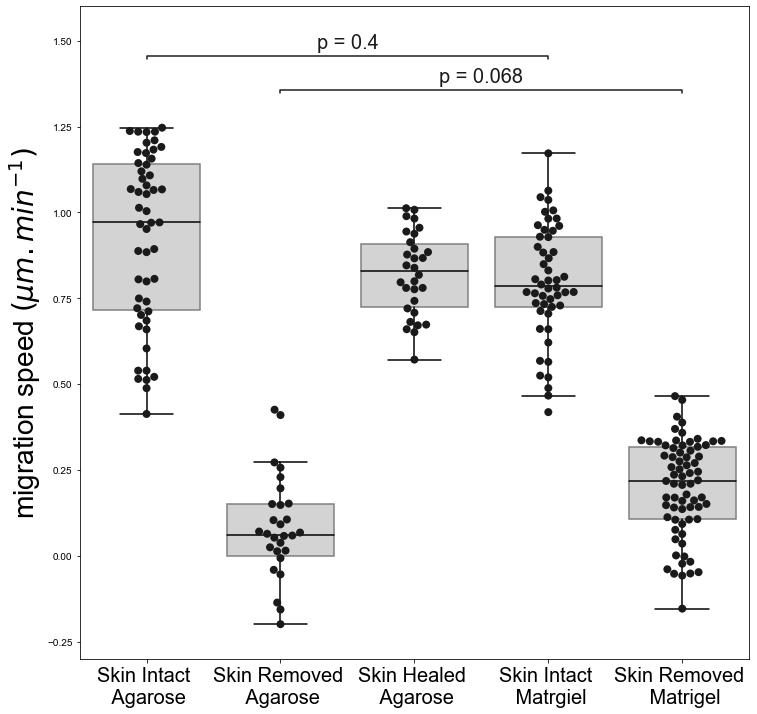

In [3]:
#make the graph

fig, ax = plt.subplots(figsize = (12,12))

sns.set(style="ticks", palette="pastel")

#make the boxplot.
myPlot = sns.boxplot(x=df["condition"], y=df["speed"], palette=["lightgray", "lightgray"], showfliers=False)

#overlay a swarmplot
myPlot = sns.swarmplot(x=df["condition"], y=df["speed"], palette=["k", "k"], marker = "o", alpha = 1, size=8)
sns.set(font_scale = 2)


plt.setp(ax.lines, color="0")


#add significance lines (from SAS reports)


x1, x2 = 1, 4
y, h, col = df['speed'].max() + .1, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.01, "p = 0.068", ha='center', va='bottom', color=col, fontsize = 20)

x1, x2 = 0, 3
y, h, col = df['speed'].max() + .2, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.01, "p = 0.4", ha='center', va='bottom', color=col, fontsize = 20)

#x1, x2 = 0, 2
#y, h, col = df['speed'].max() + .18, 0.01, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h+0.001, "$p=4e^{-5}$", ha='center', va='bottom', color=col, fontsize = 16)


ax.set_title("")
#ax.set_ylabel("mi")
ax.set_ylim(-0.3,1.6)
#ax.set_xlabel("")



#set the axis names
plt.ylabel("migration speed $(\mu m.min^{-1})$", fontdict={'fontsize' : 28})
#ax.set_xticks([])
plt.xlabel("")

ax.set_xticklabels(("Skin Intact \n Agarose", "Skin Removed \n Agarose", "Skin Healed \n Agarose", "Skin Intact \n Matrgiel", "Skin Removed \n Matrigel"), size = 20)
plt.xticks(rotation=0)

plt.show()





#save the plot
figure = myPlot.get_figure()
figure.savefig("matrigel_migration_quant.png",bbox_inches='tight', dpi=800)


In [10]:
#statistical tests


skin_removed_agarose = df[df['condition']=='Skin Removed  + Agarose']
skin_healed_agarose = df[df['condition']=='Skin Healed + Skin Healed + Agarose']
skin_healed_matrigel = df[df['condition']=='Skin Removed + Matrigel']
skin_intact_agarose = df[df['condition']=='Skin Intact + Agarose']
skin_intact_matrigel = df[df['condition']=='Skin Intact + Matrigel']

print(np.mean(skin_intact_agarose))

print("agarose vs matrigel intact")
print(ttest_ind(skin_intact_agarose['speed'], skin_intact_matrigel['speed']))
#print("pre vs matrigel")
#print(ttest_ind(pre['speed'], mat['speed']))
#print("post vs matrigel")
#print(ttest_ind(post['speed'], mat['speed']))


speed    0.919478
dtype: float64
agarose vs matrigel intact
Ttest_indResult(statistic=2.8658556294842015, pvalue=0.005089957196793131)


In [8]:
df

,condition,speed,embryo,measurement
0,Skin Intact + Agarose,1.235259,1,1
1,Skin Intact + Agarose,1.237300,1,2
2,Skin Intact + Agarose,1.156816,1,3
3,Skin Intact + Agarose,1.176062,1,4
4,Skin Intact + Agarose,1.190934,1,5
...,...,...,...,...
226,Skin Removed + Matrigel,0.405230,7,227
227,Skin Removed + Matrigel,0.331880,7,228
228,Skin Removed + Matrigel,0.313843,7,229
229,Skin Removed + Matrigel,0.236284,7,230


In [10]:
#actual statistical tests

aov = pg.mixed_anova(dv='speed', within='embryo', between = 'condition', subject='measurement', data=df)

C:\Users\dalledam\AppData\Local\Continuum\anaconda3\envs\segmentation\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\dalledam\AppData\Local\Continuum\anaconda3\envs\segmentation\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\dalledam\AppData\Local\Continuum\anaconda3\envs\segmentation\lib\site-packages\pandas\core\frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
C:\Users\dalledam\AppData\Local\Continuum\anaconda3\envs\segmentation\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\dalledam\AppData\Local\Continuum\anaconda3\envs\segmentation\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_div

LinAlgError: Eigenvalues did not converge